Methods

- Delta E (color's distance)
- Color space
- ML model
- Multi collection

# color space

**lab color space**

L – Lightness ( Intensity ).

a – color component ranging from Green to Magenta.

b – color component ranging from Blue to Yellow.

The Lab color space is quite different from the RGB color space. In RGB color space the color information is separated into three channels but the same three channels also encode brightness information. On the other hand, in Lab color space, the L channel is independent of color information and encodes brightness only. The other two channels encode color.

It has the following properties.

Perceptually uniform color space which approximates how we perceive color.
Independent of device ( capturing or displaying ).
Used extensively in Adobe Photoshop.
Is related to the RGB color space by a complex transformation equation.

In [1]:
import cv2
import numpy as np

In [2]:
# read input image
bright = cv2.imread("assets/outdoor.png")
dark  = cv2.imread("assets/indoor.png")

In [3]:
# convert to LAB space
brightLAB = cv2.cvtColor(bright,cv2.COLOR_BGR2LAB)
darkLAB = cv2.cvtColor(dark,cv2.COLOR_BGR2LAB)
print("brightLAB",brightLAB.shape)
print("darkLAB",darkLAB.shape)

brightLAB (262, 254, 3)
darkLAB (255, 254, 3)


In [4]:
cv2.imshow("Bright LAB",brightLAB)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
cv2.imshow("Dark LAB",darkLAB)
cv2.waitKey()
cv2.destroyAllWindows()

**YCrCb color space**

The YCrCb color space is derived from the RGB color space and has the following three compoenents.

Y – Luminance or Luma component obtained from RGB after gamma correction.

Cr = R – Y ( how far is the red component from Luma ).

Cb = B – Y ( how far is the blue component from Luma ).

This color space has the following properties.

Separates the luminance and chrominance components into different channels.
Mostly used in compression ( of Cr and Cb components ) for TV Transmission.
Device dependent.

Observations

- Similar observations as LAB can be made for Intensity and color components with regard to Illumination changes.
- Perceptual difference between Red and Orange is less even in the outdoor image as compared to LAB.
- White has undergone change in all 3 components.

In [6]:
#python
brightYCB = cv2.cvtColor(bright,cv2.COLOR_BGR2YCrCb)
darkYCB = cv2.cvtColor(dark,cv2.COLOR_BGR2YCrCb)
print('brightYCB',brightYCB.shape)
print('darkYCB',darkYCB.shape)

brightYCB (262, 254, 3)
darkYCB (255, 254, 3)


In [17]:
cv2.imshow("Bright YCB",brightYCB)
cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
cv2.imshow("Dark YCB",darkYCB)
cv2.waitKey()
cv2.destroyAllWindows()

**HSV color space**

The HSV color space has the following three components

H – Hue ( Dominant Wavelength ).

S – Saturation ( Purity / shades of the color ).

V – Value ( Intensity ).

Let’s enumerate some of its properties.

Best thing is that it uses only one channel to describe color (H), making it very intuitive to specify color.
Device dependent.

The H, S and V components of the two images are shown below.

In [19]:
brightHSV = cv2.cvtColor(bright, cv2.COLOR_BGR2HSV)
darkHSV = cv2.cvtColor(dark, cv2.COLOR_BGR2HSV)
print("brightHSV",brightHSV.shape)
print("darkHSV",darkHSV.shape)

brightHSV (262, 254, 3)
darkHSV (255, 254, 3)


In [20]:
cv2.imshow("bright HSV",brightHSV)
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
cv2.imshow("dark HSV",darkHSV)
cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
#python
bgr = [40, 158, 16]
thresh = 40
 
minBGR = np.array([bgr[0] - thresh, bgr[1] - thresh, bgr[2] - thresh])
maxBGR = np.array([bgr[0] + thresh, bgr[1] + thresh, bgr[2] + thresh])
 
maskBGR = cv2.inRange(bright,minBGR,maxBGR)
resultBGR = cv2.bitwise_and(bright, bright, mask = maskBGR)
 
#convert 1D array to 3D, then convert it to HSV and take the first element
# this will be same as shown in the above figure [65, 229, 158]
hsv = cv2.cvtColor( np.uint8([[bgr]] ), cv2.COLOR_BGR2HSV)[0][0]
 
minHSV = np.array([hsv[0] - thresh, hsv[1] - thresh, hsv[2] - thresh])
maxHSV = np.array([hsv[0] + thresh, hsv[1] + thresh, hsv[2] + thresh])
 
maskHSV = cv2.inRange(brightHSV, minHSV, maxHSV)
resultHSV = cv2.bitwise_and(brightHSV, brightHSV, mask = maskHSV)
 
#convert 1D array to 3D, then convert it to YCrCb and take the first element
ycb = cv2.cvtColor( np.uint8([[bgr]] ), cv2.COLOR_BGR2YCrCb)[0][0]
 
minYCB = np.array([ycb[0] - thresh, ycb[1] - thresh, ycb[2] - thresh])
maxYCB = np.array([ycb[0] + thresh, ycb[1] + thresh, ycb[2] + thresh])
 
maskYCB = cv2.inRange(brightYCB, minYCB, maxYCB)
resultYCB = cv2.bitwise_and(brightYCB, brightYCB, mask = maskYCB)
 
#convert 1D array to 3D, then convert it to LAB and take the first element
lab = cv2.cvtColor( np.uint8([[bgr]] ), cv2.COLOR_BGR2LAB)[0][0]
 
minLAB = np.array([lab[0] - thresh, lab[1] - thresh, lab[2] - thresh])
maxLAB = np.array([lab[0] + thresh, lab[1] + thresh, lab[2] + thresh])
 
maskLAB = cv2.inRange(brightLAB, minLAB, maxLAB)
resultLAB = cv2.bitwise_and(brightLAB, brightLAB, mask = maskLAB)
 
cv2.imshow("Result BGR", resultBGR)
cv2.imshow("Result HSV", resultHSV)
cv2.imshow("Result YCB", resultYCB)
cv2.imshow("Output LAB", resultLAB)

cv2.waitKey()
cv2.destroyAllWindows()

# Delta E

In [7]:
import os
import cv2
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def cal_dE(img,img2):
    '''
    Calculate Delta E distance between 2 images
    Args:
        img: source image
        img2: image
    Return:
        dE: delta E
    '''
    # convert to Lab space image1
    lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
    L1,A1,B1 = cv2.split(lab)
    L1 = L1.mean()
    A1 = A1.mean()
    B1 = B1.mean()
    
    # convert to Lab space image2
    lab2 = cv2.cvtColor(img2,cv2.COLOR_BGR2LAB)
    L2,A2,B2 = cv2.split(lab2)
    L2 = L2.mean()
    A2 = A2.mean()
    B2 = B2.mean()
    dL = L1 - L2
    dA = A1 - A2
    dB = B1 - B2
    dE = np.sqrt(dL**2 + dA**2 + dB**2)
    return dE

Text(0.5, 1.0, 'deltaE: 5.569885942398478')

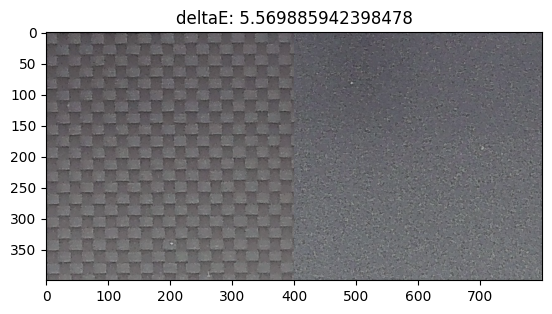

In [9]:
src = "crop"
labels = os.listdir(src)
label = random.choice(labels)
path = os.path.join(src,label)
imgs = os.listdir(path)

# read the first image
n = random.randint(0,len(imgs)-1)
path = os.path.join(src,label,imgs[n])
img = cv2.imread(path)

# read the second image
n = random.randint(0,len(imgs)-1)
path = os.path.join(src,label,imgs[n])
img2 = cv2.imread(path)

dE = cal_dE(img,img2)

out = cv2.hconcat([img,img2])
plt.imshow(out)
plt.title(f'deltaE: {dE}')

Text(0.5, 1.0, 'brown-red deltaE: 53.93773527839691')

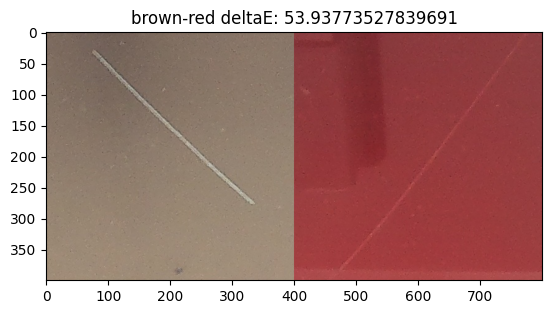

In [10]:
# read the first image
src = "crop"
labels = os.listdir(src)
label1 = random.choice(labels)
path = os.path.join(src,label1)
imgs = os.listdir(path)
img = random.choice(imgs)
path = os.path.join(src,label1,img)
img1 = cv2.imread(path)

# read the second image
src = "crop"
labels = os.listdir(src)
label2 = random.choice(labels)
path = os.path.join(src,label2)
imgs = os.listdir(path)
img = random.choice(imgs)
path = os.path.join(src,label2,img)
img2 = cv2.imread(path)

# calculate deltaE
dE = cal_dE(img1,img2)

# display
out = cv2.hconcat([img1,img2])
out = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)

plt.imshow(out)
plt.title(f'{label1}-{label2} deltaE: {dE}')

Color deltaE
- Brown: 9
- White:
- Black: 69
- Red: 14

In [11]:
src = "crop"
labels = os.listdir(src)
print(labels)

['brown', 'white', 'black', 'red']


In [12]:
label = "red"

path = os.path.join(src,label)
imgs = os.listdir(path)
path = os.path.join(src,label,imgs[0])
img0 = cv2.imread(path)
dEs = []

# create csv
header = ['No','Image','DeltaE','Comment']
csv_file = open(f'assets/{label}.csv', 'w', encoding='UTF8')
writer = csv.writer(csv_file)
# write the header
writer.writerow(header)
    
for i,img in enumerate(imgs):
    path = os.path.join(src,label,img)
    img1 = cv2.imread(path)
    dE = cal_dE(img0,img1)
    dEs.append(dE)
    row = [i+1,img,dE] 
    writer.writerow(row)

idx = np.argmax(dEs)
print("Max DeltaE:",dEs[idx])

# close csv file
csv_file.close()

Max DeltaE: 13.787846219488568


# average color

Text(0.5, 1.0, 'average brown')

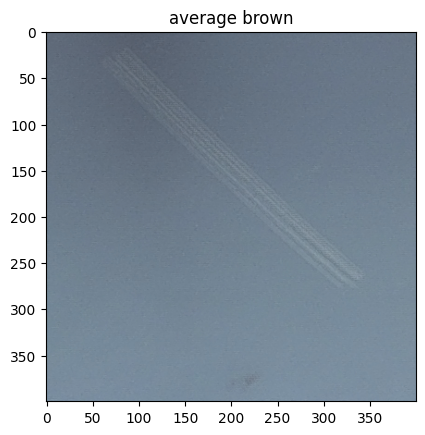

In [17]:
label = "brown"
DIM = 400

path = os.path.join(src,label)
imgs = os.listdir(path)
out = np.zeros((DIM,DIM,3))

for img in imgs:
    
    path = os.path.join(src,label,img)
    img1 = cv2.imread(path)
    lab = cv2.cvtColor(img1,cv2.COLOR_BGR2LAB)
    out += lab
    
out = out/len(imgs)
out = out.astype('uint8')
out = cv2.cvtColor(out,cv2.COLOR_LAB2BGR)
cv2.imwrite("assets/"+label+"_avg.png",out)

plt.imshow(out)
plt.title("average "+label)

In [18]:
# check distance with average image
img0 = cv2.imread("assets/black_avg.png")
dEs = []

label = "white"
path = os.path.join(src,label)
imgs = os.listdir(path)

for img in imgs:
    path = os.path.join(src,label,img)
    img1 = cv2.imread(path)
    dE = cal_dE(img0,img1)
    dEs.append(dE)

imax = np.argmax(dEs)
imin = np.argmin(dEs)

print("Min DeltaE:",dEs[imin],"Max DeltaE:",dEs[imax])

Min DeltaE: 40.0173612168953 Max DeltaE: 163.4065688467511


- white: Min DeltaE: 131.46901584235704 Max DeltaE: 255.00000001924454
- black: Min DeltaE: 47.99201988518101 Max DeltaE: 159.41938381408156
- red: Min DeltaE: 102.81937453873678 Max DeltaE: 114.27773151684185
- brown: Min DeltaE: 135.2406259526888 Max DeltaE: 144.91407198995844

In [24]:
# check deltaE
img0 = cv2.imread("assets/zero.png")
dEs = []

label = "white"
path = os.path.join(src,label)
imgs = os.listdir(path)

for img in imgs:
    path = os.path.join(src,label,img)
    img1 = cv2.imread(path)
    dE = cal_dE(img0,img1)
    dEs.append(dE)

imax = np.argmax(dEs)
imin = np.argmin(dEs)

print("Min DeltaE:",dEs[imin],"Max DeltaE:",dEs[imax])

Min DeltaE: 131.46901584235704 Max DeltaE: 255.00000001924454


In [25]:
# check deltaE
img0 = cv2.imread("assets/zero.png")
dEs = []

label = "black"
path = os.path.join(src,label)
imgs = os.listdir(path)

for img in imgs:
    path = os.path.join(src,label,img)
    img1 = cv2.imread(path)
    dE = cal_dE(img0,img1)
    dEs.append(dE)

imax = np.argmax(dEs)
imin = np.argmin(dEs)

print("Min DeltaE:",dEs[imin],"Max DeltaE:",dEs[imax])

Min DeltaE: 47.99201988518101 Max DeltaE: 159.41938381408156


In [26]:
# check deltaE
img0 = cv2.imread("assets/zero.png")
dEs = []

label = "red"
path = os.path.join(src,label)
imgs = os.listdir(path)

for img in imgs:
    path = os.path.join(src,label,img)
    img1 = cv2.imread(path)
    dE = cal_dE(img0,img1)
    dEs.append(dE)

imax = np.argmax(dEs)
imin = np.argmin(dEs)

print("Min DeltaE:",dEs[imin],"Max DeltaE:",dEs[imax])

Min DeltaE: 102.81937453873678 Max DeltaE: 114.27773151684185


In [27]:
# check deltaE
img0 = cv2.imread("assets/zero.png")
dEs = []

label = "brown"
path = os.path.join(src,label)
imgs = os.listdir(path)

for img in imgs:
    path = os.path.join(src,label,img)
    img1 = cv2.imread(path)
    dE = cal_dE(img0,img1)
    dEs.append(dE)

imax = np.argmax(dEs)
imin = np.argmin(dEs)

print("Min DeltaE:",dEs[imin],"Max DeltaE:",dEs[imax])

Min DeltaE: 135.2406259526888 Max DeltaE: 144.91407198995844


In [12]:
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt

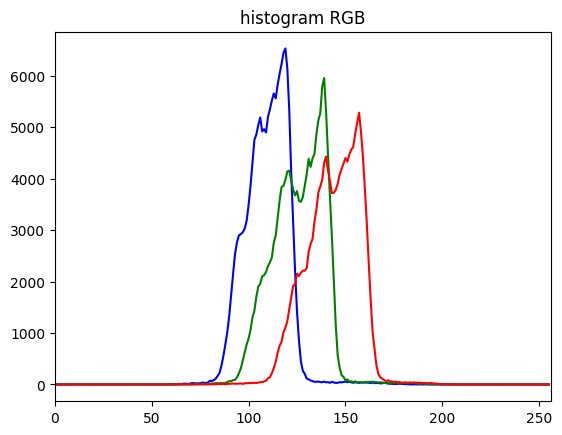

In [13]:
color = ('b','g','r')
src = "crop"
#random read image
labels = os.listdir(src)
label = random.choice(labels)
path = os.path.join(src,label)
imgs = os.listdir(path)
img = random.choice(imgs)
path = os.path.join(path,img)
img = cv2.imread(path)
# plot histogram
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title("histogram RGB")
plt.show()

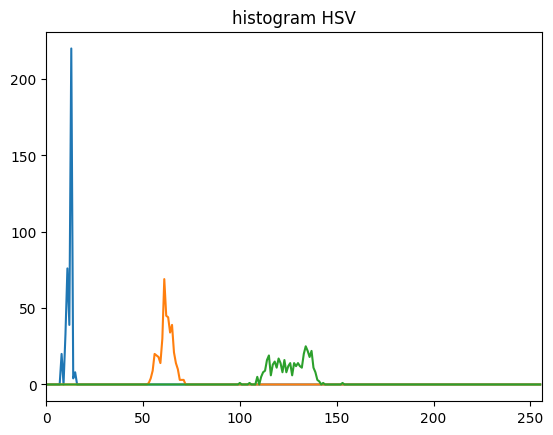

In [14]:
# parse HSV historgram
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]
channels = [h,s,v]
# plot histogram
for i in range(3):
    histr = cv2.calcHist(channels[i],[0],None,[256],[0,256])
    plt.plot(histr)
    plt.xlim([0,256])

plt.title("histogram HSV")
plt.show()

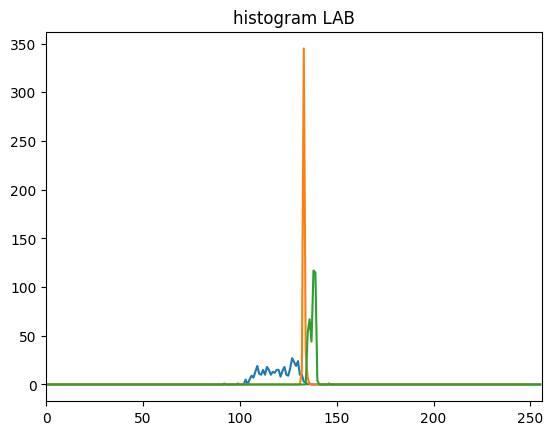

In [15]:
# parse LAB historgram
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
l = lab[:,:,0]
a = lab[:,:,1]
b = lab[:,:,2]
channels = [l,a,b]
# plot histogram
for i in range(3):
    histr = cv2.calcHist(channels[i],[0],None,[256],[0,256])
    plt.plot(histr)
    plt.xlim([0,256])

plt.title("histogram LAB")
plt.show()

In [16]:
histr.shape

(256, 1)

In [17]:
hist1 = cv2.calcHist(channels[0],[0],None,[256],[0,256])
hist2 = cv2.calcHist(channels[1],[0],None,[256],[0,256])
hist3 = cv2.calcHist(channels[2],[0],None,[256],[0,256])

In [18]:
hist2.shape

(256, 1)

In [22]:
x = np.concatenate((hist1,hist2,hist3))
x = x.ravel()
x.shape

(768,)

# referenes

[measuring color difference](https://answers.opencv.org/question/228637/measuring-color-difference-from-an-roi-within-the-image-using-deltae-color-difference/)

[create lab color chart](https://stackoverflow.com/questions/52741742/how-to-create-lab-color-chart-using-opencv)

[color-spaces](https://learnopencv.com/color-spaces-in-opencv-cpp-python/)

[How to compute the Delta E between two images using OpenCV](https://stackoverflow.com/questions/57224007/how-to-compute-the-delta-e-between-two-images-using-opencv)